<a href="https://colab.research.google.com/github/Retr0Sys/Analisis-de-sesgos-en-noticias-IA-CFE/blob/main/AnalisisDeSesgosEnNoticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_csv("df_total.csv")

In [ ]:
df.head(5)

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


In [ ]:
corpus_simple = []

for _ in range(2): # Reduced repetitions to 2
  corpus_simple.extend(df.news)

len(corpus_simple)

2434

In [ ]:
sentences = [frase.lower().split() for frase in corpus_simple]

print(sentences[0])

['durante', 'el', 'foro', 'la', 'banca', 'articulador', 'empresarial', 'para', 'el', 'desarrollo', 'sostenible', 'el', 'director', 'de', 'sostenibilidad', 'y', 'clientes', 'globales', 'de', 'bbva', 'en', 'colombia', 'andrés', 'garcía', 'aseguró', 'que', 'es', 'importante', 'entender', 'que', 'la', 'sostenibilidad', 'no', 'la', 'podemos', 'asociar', 'a', 'mayores', 'costos.', 'yo', 'creo', 'que', 'el', 'no', 'tener', 'un', 'concepto', 'de', 'negocio', 'sostenible', 'puede', 'tener', 'un', 'mayor', 'impacto', 'de', 'lo', 'que', 'imaginamos.para', 'garcía', 'el', 'reto', 'más', 'importante', 'es', 'no', 'cambiar', 'prioridades', 'ni', 'que', 'compitan', 'entre', 'sí', 'necesariamente.', 'en', 'muchos', 'de', 'los', 'casos', 'se', 'debe', 'tratar', 'de', 'mantener', 'la', 'prioridad', 'en', 'cuanto', 'a', 'la', 'ambición', 'de', 'negocios', 'más', 'sostenibles', 'un', 'reto', 'enorme', 'por', 'la', 'coyuntura.', 'la', 'sostenibilidad', 'nos', 'abre', 'oportunidades', 'a', 'mejores', 'fuent

In [ ]:
model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

print(model.wv["empresarial"])
print(len(model.wv["empresarial"]))

[ 0.14662343 -0.02410088  0.04091897 -0.04623413 -0.5367564   0.13446708
  0.47201523 -0.07257977 -0.88620394 -0.49989325  0.11021598 -0.47851306
  0.00194793  0.7958376  -0.11702314  0.62010264  0.44522133  0.6453725
 -0.7791228  -0.21039094  0.76793134  0.07251985  0.9600728  -0.28162575
 -0.41806498 -0.07821405 -0.18071325  0.5767831  -0.31445232 -0.25174034
 -0.18166177 -1.0726153   0.3321402  -0.54746944 -0.48389202 -0.73530763
  1.3967866  -0.34556565  0.04275019 -0.45480713  0.3002257   0.3917097
 -0.3206438  -0.3532228   0.37550446  0.32434714  0.0432757  -0.17138095
  0.13444291  0.5538886 ]
50


In [ ]:
palabras_a_graficar = [
    "mujer",
    "hombre",
    "joven",
    "viejo",
    "trabajador",
    "nativo",
    "inmigrante",
    "refugiado",
    "ángel",
    "malo"
]

palabras_validas = [p for p in palabras_a_graficar if p in model.wv]
print("Palabras que se van a graficar:", palabras_validas)

Palabras que se van a graficar: ['mujer', 'hombre', 'joven', 'viejo', 'trabajador', 'nativo', 'refugiado', 'ángel', 'malo']


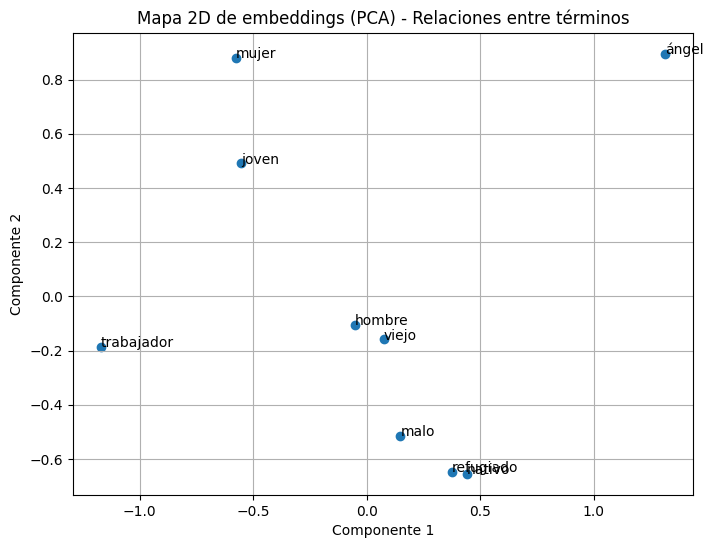

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vectores = [model.wv[p] for p in palabras_validas]

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectores)

plt.figure(figsize=(8,6))

x_vals = coords_2d[:, 0]
y_vals = coords_2d[:, 1]

plt.scatter(x_vals, y_vals)

for i, palabra in enumerate(palabras_validas):
    plt.annotate(palabra, (x_vals[i], y_vals[i]))

plt.title("Mapa 2D de embeddings (PCA) - Relaciones entre términos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()